In [6]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")

In [8]:
classes = ['Aerodactyl', 'Bulbasaur', 'Charmander', 'Dratini', 'Fearow', 'Meowth', 'Pikachu', 'Psyduck', 'Spearow', 'Squirtle' ]

In [9]:
for c in classes:
    if not os.path.isdir("val_images/" + c):
        os.mkdir("val_images/" + c)

In [10]:
# split = 0.9
# for dirc in os.listdir("Train"):
#     path = "Train/" + dirc
#   #all images
#     images = os.listdir(path)
#     split_size = int(len(images)*split)

#     files_to_move = images[split_size:]
#     print(files_to_move)
#     print()

#     #move
#     for f in files_to_move:
#         src = os.path.join(path,f) #path+file
#         dest = os.path.join("val_images/",dirc)
#         shutil.move(src,dest)

['ef7f7eeaa897478bbe1df7b0bb0522cb-41.jpg', 'ef7f7eeaa897478bbe1df7b0bb0522cb-42.jpg', 'ef7f7eeaa897478bbe1df7b0bb0522cb-5.jpg', 'ef7f7eeaa897478bbe1df7b0bb0522cb-6.jpg', 'ef7f7eeaa897478bbe1df7b0bb0522cb-8.jpg', 'f403dcd3136643e4b43c7d01e14494bc.jpg', 'f6de83f1ed034679bf49b84e0af203ce.jpg', 'f9b2de8410924cb49e75c0178b15103f.jpg']

['84fab3c6980440cea3ae080e165829b6.jpg', '865a470c5bea4b5dafac4cad972e91fa.jpg', '8a76af953ea34528b9e060fd4dd698c2.jpg', '8b18f146410a487e96587cca1867bf60.jpg', '941a3fe752a44319b36873984af0736f.jpg', '9573aa9a0c354f739be4270e283730cf.jpg', '972ecc049e20442eaa6627bfae4ad3c8.jpg', '983ffaa860204dd483e07d54dae85c1d.jpg', '995fb9cc84fb453f9e2f303d082b9273.jpg', 'a3cbb796a8594576aff2de5d612ddf9f.jpg', 'a6add7027a5442639911b4a2c46af75e.jpg', 'aa9b196e27694c9e96df3221bd0dccf9.jpg', 'ac9fe1cda0614fae9b7dae05f2a6b3e3.jpg', 'acadf9ce8912453886f5a25faededb15.jpg', 'b569baa3113d40078326ae3d37e9b658.jpg', 'bd0ddf72760647d1a4170998790f7aa1.jpg', 'c4e57436ca6a4a789a56eb88

In [12]:
for dirc in os.listdir("Train/"):
    path = "Train/" + dirc
    img = os.listdir(path)
    print(dirc, len(img))

Aerodactyl 72
Bulbasaur 229
Charmander 237
Dratini 88
Fearow 99
Meowth 56
Pikachu 241
Psyduck 128
Spearow 105
Squirtle 223


In [14]:
for dirc in os.listdir("val_images/"):
    path = "val_images/" + dirc
    img = os.listdir(path)
    print(dirc, len(img))

Aerodactyl 8
Bulbasaur 26
Charmander 27
Dratini 10
Fearow 12
Meowth 7
Pikachu 27
Psyduck 15
Spearow 12
Squirtle 25


## *Image Augmentation*

In [15]:
from keras.preprocessing import image

In [16]:
train_gen = image.ImageDataGenerator(rotation_range=20,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.3,
                                     horizontal_flip = True
                                     )

In [17]:
#no values because it is validation dataset
val_datagen = image.ImageDataGenerator()

### Train Gen

In [19]:
train_generator = train_gen.flow_from_directory("Train",
                                                target_size = (224,224),
                                                class_mode = "categorical",
                                                shuffle = True,
                                                batch_size = 32
                                                )

Found 1473 images belonging to 10 classes.


In [20]:
train_generator.class_indices

{'Aerodactyl': 0,
 'Bulbasaur': 1,
 'Charmander': 2,
 'Dratini': 3,
 'Fearow': 4,
 'Meowth': 5,
 'Pikachu': 6,
 'Psyduck': 7,
 'Spearow': 8,
 'Squirtle': 9}

### Just trying

In [21]:
d,l = next(train_generator)

In [22]:
d.shape, l.shape

((32, 224, 224, 3), (32, 10))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


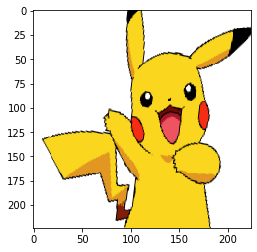

In [23]:
plt.imshow(d[0].astype('int'))
print(l[0])

### Val **Gen**   

In [24]:
val_generator = val_datagen.flow_from_directory("val_images/",
                                                target_size = (224,224),
                                                class_mode = 'categorical',
                                                batch_size=32)

Found 169 images belonging to 10 classes.


In [25]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions


In [26]:
resnet = ResNet50(include_top= True, weights= "imagenet")

102973440/102967424 [==============================] - 22s 0us/step


In [27]:
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Model

#get top n-2 layers 
x = resnet.layers[-2].output
fun = Dense(10, activation = "softmax")(x)

In [28]:
model = Model(inputs=resnet.input, outputs = fun)

In [29]:
# Freeze layers
for l in model.layers[:-6]:
    l.trainable = False
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics=["accuracy"])

In [30]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [31]:
hist = model.fit(train_generator,steps_per_epoch=1306//32,epochs=10,
                              validation_data=val_generator,validation_steps=168//32)

Epoch 1/10
 3/40 [=>............................] - ETA: 1:31 - loss: 2.1790 - accuracy: 0.2917

C:\Users\NAIVEDH\anaconda3\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


40/40 [==============================] - 196s 5s/step - loss: 0.9693 - accuracy: 0.7094 - val_loss: 0.7932 - val_accuracy: 0.7875
Epoch 2/10
40/40 [==============================] - 178s 4s/step - loss: 0.3916 - accuracy: 0.8719 - val_loss: 0.4959 - val_accuracy: 0.8500
Epoch 3/10
40/40 [==============================] - 174s 4s/step - loss: 0.2641 - accuracy: 0.9135 - val_loss: 0.4390 - val_accuracy: 0.8813
Epoch 4/10
40/40 [==============================] - 159s 4s/step - loss: 0.2323 - accuracy: 0.9295 - val_loss: 0.4498 - val_accuracy: 0.8813
Epoch 5/10
40/40 [==============================] - 140s 4s/step - loss: 0.1761 - accuracy: 0.9472 - val_loss: 0.3971 - val_accuracy: 0.8938
Epoch 6/10
40/40 [==============================] - 136s 3s/step - loss: 0.1277 - accuracy: 0.9704 - val_loss: 0.5747 - val_accuracy: 0.8313
Epoch 7/10
40/40 [==============================] - 143s 4s/step - loss: 0.1525 - accuracy: 0.9528 - val_loss: 0.5814 - val_accuracy: 0.8562
Epoch 8/10
40/40 [======

In [68]:
y_pred = model.predict(val_generator)

In [74]:
np.argmax(y_pred, axis =1)

array([1, 6, 0, 4, 0, 3, 9, 3, 9, 2, 7, 8, 6, 4, 6, 4, 1, 7, 9, 8, 2, 7,
       9, 8, 2, 1, 8, 6, 8, 9, 6, 8, 3, 6, 2, 4, 4, 3, 9, 4, 1, 0, 3, 4,
       3, 7, 9, 7, 1, 5, 1, 2, 8, 1, 6, 1, 8, 4, 1, 0, 9, 0, 5, 9, 1, 1,
       8, 1, 9, 2, 8, 6, 4, 9, 6, 6, 6, 9, 6, 7, 3, 3, 8, 2, 9, 1, 9, 4,
       6, 7, 8, 2, 0, 4, 6, 4, 8, 1, 9, 1, 1, 9, 1, 4, 2, 8, 3, 6, 4, 9,
       7, 7, 1, 1, 6, 6, 1, 5, 8, 2, 1, 4, 4, 1, 9, 6, 2, 6, 4, 2, 4, 5,
       0, 6, 6, 4, 1, 1, 1, 5, 7, 9, 4, 4, 6, 1, 0, 1, 2, 9, 6, 2, 1, 6,
       7, 1, 2, 1, 1, 8, 2, 7, 4, 0, 6, 4, 9, 3, 8], dtype=int64)

In [70]:
model.evaluate(val_generator)

6/6 [==============================] - 10s 2s/step - loss: 0.6885 - accuracy: 0.8343


[0.6884867548942566, 0.834319531917572]

In [103]:
x_test = []
sample = pd.read_csv("sample_submission.csv")
sample.drop(columns=["Class"],inplace = True)
sample = sample.values
sample = sample.reshape(sample.shape[0],)
for folder in os.listdir("Test/"):
    p = "Test/" + folder
#     print(folder)
#     all_images = os.listdir(p)
#     all_images = sample.shape[0]
    for im in sample:
#         im
        im = image.load_img(os.path.join(p,im),target_size = (224,224))
        im = image.img_to_array(im)
        im = np.array(im)
#         im = preprocess_input(im)
        x_test.append(im)

In [104]:
x_test = np.array(x_test)
img_dic = []
for imgs in sample:
    #print(imgs)
    img_dic.append(imgs)
img_dic = np.array(img_dic)
img_dic = img_dic.reshape(img_dic.shape[0],1)

In [105]:
# y_pred = np.argmax(model.predict(x_test), axis=1)
y_pred_ = []
for i in range(0,x_test.shape[0]):
    k = model.predict(x_test[i].reshape(1,224,224,3))
#     print(k)
    m = np.argmax(k)
    y_pred_.append(m)
#     print(y_pred_)
y_pred_ = np.array(y_pred_)
# x_test[125].shape
# model.predict_classes(x_test[4].reshape(1,150,150,3))[0]

In [117]:
y_pred_ = np.array(y_pred_).reshape(-1,1)

In [118]:
img_dic.shape, y_pred_.shape

((187, 1), (187, 1))

In [119]:
y_prediction1 = np.hstack((img_dic,y_pred_))

In [120]:
df = pd.DataFrame(data = y_prediction1,columns=["Name","Class"])
df.to_csv("Pokedex2.csv",index=False)